In [1]:
import tensorflow as tf    
import keras
from keras.utils import to_categorical
from keras import layers, models, callbacks
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import glob
import cv2


In [2]:
SEED = 1
np.random.seed(SEED)
sns.set(style="white", context="notebook", palette="deep")

In [4]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [5]:
y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)
X_train /= 255
test /= 255

X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
test = test.to_numpy().reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=SEED, train_size=0.9)



In [18]:
class CNN_model:
    

    
    def __init__(self):
        self.epochs = 20
        self.batch_size = 86
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same", input_shape=(28, 28, 1)))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation="relu", padding="same"))
        
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(256, activation="relu"))
        self.model.add(layers.Dropout(0.5))
        self.model.add(layers.Dense(10, activation="softmax"))
       
        self.model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
    def learning(self,X_train, X_valid, y_train, y_valid):
        learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
        data_aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)
        history = self.model.fit_generator(data_aug.flow(X_train, y_train, batch_size=self.batch_size), 
                             epochs=self.epochs,
                             validation_data=(X_valid, y_valid),
                             steps_per_epoch=len(X_train) // self.batch_size,
                             callbacks=[learning_rate_reduction])
        self.model.save('models/model_1')

        plt.subplots(figsize=(10, 12))

        plt.subplot(211)
        plt.title("Loss")
        loss = history.history["loss"]
        plt.plot(range(1, len(loss) + 1), loss, "bo-", label="Training Loss")
        loss = history.history["val_loss"]
        plt.plot(range(1, len(loss) + 1), loss, "ro-", label="Validation Loss")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()

        plt.subplot(212)
        plt.title("Accuracy")
        acc = history.history["acc"]
        plt.plot(range(1, len(loss) + 1), acc, "bo-", label="Training Acc")
        acc = history.history["val_acc"]
        plt.plot(range(1, len(loss) + 1), acc, "ro-", label="Validation Acc")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()
        
    def load_model(self, path = 'models/model_1'):
        self.model = keras.models.load_model(path)
    
    def predict(self,X_valid,y_valid):
        pred = self.model.predict(X_valid)
        pred_classes = np.argmax(pred, axis=1)
        print(pred)
        pred_true = np.argmax(y_valid, axis=1)
        confusion_mtx = confusion_matrix(pred_true, pred_classes)
        sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
    def save_model(self,model_name = 'model_100'):
        self.model.save('models/'+model_name)
        print("SUCC SAVED")


In [7]:
filenames = [img for img in glob.glob("test/*.png")]

filenames.sort() # ADD THIS LINE

images = []

true = np.array([np.array([0,0,0,0,0,0,0,1,0,0]),
        np.array([0,0,1,0,0,0,0,0,0,0]),
       np.array([0,0,0,0,0,1,0,0,0,0]),
       np.array([0,0,0,0,1,0,0,0,0,0]),
       np.array([0,0,0,1,0,0,0,0,0,0]),
       np.array([1,0,0,0,0,0,0,0,0,0])])


for img in filenames:
    n = cv2.imread(img,0)
#     
    n = pd.DataFrame(n)
    n /= 255
    
    images.append(np.expand_dims(n, axis=2))
    print (img)
images= np.array(images)
# images /= 255

In [8]:
print(type(X_train))
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(true.shape)
print(images.shape)


<class 'numpy.ndarray'>
(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)
(6, 10)
(0,)


In [9]:
images[3]

IndexError: index 3 is out of bounds for axis 0 with size 0

In [65]:
images[0].shape

(28, 28, 1)

In [19]:
cnn_mod = CNN_model()
# cnn_mod.load_model()
# cnn_mod.predict(images,true)

Epoch 1/20
439/439 [==============================] - 66s 150ms/step - loss: 0.8123 - acc: 0.7191 - val_loss: 0.0987 - val_acc: 0.9679 - lr: 0.0010
Epoch 2/20
439/439 [==============================] - 63s 143ms/step - loss: 0.2076 - acc: 0.9396 - val_loss: 0.0531 - val_acc: 0.9829 - lr: 0.0010
Epoch 3/20
439/439 [==============================] - 64s 146ms/step - loss: 0.1520 - acc: 0.9568 - val_loss: 0.0351 - val_acc: 0.9898 - lr: 0.0010
Epoch 4/20
439/439 [==============================] - 67s 153ms/step - loss: 0.1272 - acc: 0.9634 - val_loss: 0.0413 - val_acc: 0.9876 - lr: 0.0010
Epoch 5/20
439/439 [==============================] - 63s 144ms/step - loss: 0.1180 - acc: 0.9668 - val_loss: 0.0363 - val_acc: 0.9886 - lr: 0.0010
Epoch 6/20
439/439 [==============================] - 71s 162ms/step - loss: 0.1068 - acc: 0.9691 - val_loss: 0.0318 - val_acc: 0.9919 - lr: 0.0010
Epoch 7/20
439/439 [==============================] - 70s 159ms/step - loss: 0.0977 - acc: 0.9728 - val_loss: 0.

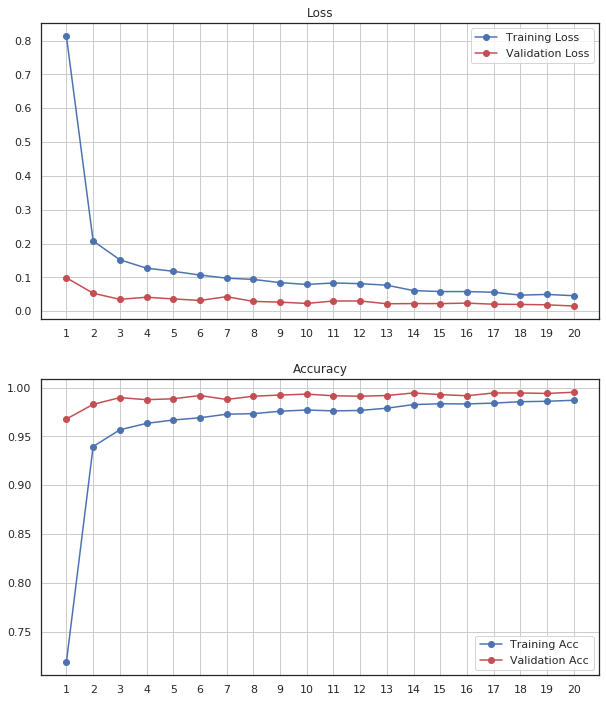

In [20]:
cnn_mod.learning(X_train, X_valid, y_train, y_valid)
cnn_mod.save_model("model_2")

In [ ]:
cnn_mod.model.save('models/model_2')

In [ ]:
# 98% model 1 i 2 
class CNN_model:
    

    
    def __init__(self):
        self.epochs = 20
        self.batch_size = 86
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same", input_shape=(28, 28, 1)))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation="relu", padding="same"))
        
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(256, activation="relu"))
        self.model.add(layers.Dropout(0.5))
        self.model.add(layers.Dense(10, activation="softmax"))
       
        self.model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
    def learning(self,X_train, X_valid, y_train, y_valid):
        learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
        data_aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)
        history = self.model.fit_generator(data_aug.flow(X_train, y_train, batch_size=self.batch_size), 
                             epochs=self.epochs,
                             validation_data=(X_valid, y_valid),
                             steps_per_epoch=len(X_train) // self.batch_size,
                             callbacks=[learning_rate_reduction])
        self.model.save('models/model_1')

        plt.subplots(figsize=(10, 12))

        plt.subplot(211)
        plt.title("Loss")
        loss = history.history["loss"]
        plt.plot(range(1, len(loss) + 1), loss, "bo-", label="Training Loss")
        loss = history.history["val_loss"]
        plt.plot(range(1, len(loss) + 1), loss, "ro-", label="Validation Loss")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()

        plt.subplot(212)
        plt.title("Accuracy")
        acc = history.history["acc"]
        plt.plot(range(1, len(loss) + 1), acc, "bo-", label="Training Acc")
        acc = history.history["val_acc"]
        plt.plot(range(1, len(loss) + 1), acc, "ro-", label="Validation Acc")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()
        
    def load_model(self, path = 'models/model_1'):
        self.model = keras.models.load_model(path)
    
    def predict(self,X_valid,y_valid):
        pred = self.model.predict(X_valid)
        pred_classes = np.argmax(pred, axis=1)
        print(pred)
        pred_true = np.argmax(y_valid, axis=1)
        confusion_mtx = confusion_matrix(pred_true, pred_classes)
        sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
    def save_model(self,model_name = 'model_100'):
        self.model.save('models/'+model_name)
        print("SUCC SAVED")




In [ ]:
class CNN_model:
    

    
    def __init__(self):
        self.epochs = 20
        self.batch_size = 86
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same", input_shape=(28, 28, 1)))
        self.model.add(BatchNormalization())
        self.model.add(layers.Conv2D(filters=32, kernel_size=(7, 7), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(BatchNormalization())
        self.model.add(layers.Conv2D(filters=64, kernel_size=(7, 7), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(256, activation="relu"))
        self.model.add(layers.Dropout(0.5))
        self.model.add(layers.Dense(10, activation="softmax"))
       
        self.model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
    def learning(self,X_train, X_valid, y_train, y_valid):
        learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
        data_aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)
        history = self.model.fit_generator(data_aug.flow(X_train, y_train, batch_size=self.batch_size), 
                             epochs=self.epochs,
                             validation_data=(X_valid, y_valid),
                             steps_per_epoch=len(X_train) // self.batch_size,
                             callbacks=[learning_rate_reduction])
        
        plt.subplots(figsize=(10, 12))

        plt.subplot(211)
        plt.title("Loss")
        loss = history.history["loss"]
        plt.plot(range(1, len(loss) + 1), loss, "bo-", label="Training Loss")
        loss = history.history["val_loss"]
        plt.plot(range(1, len(loss) + 1), loss, "ro-", label="Validation Loss")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()

        plt.subplot(212)
        plt.title("Accuracy")
        acc = history.history["acc"]
        plt.plot(range(1, len(loss) + 1), acc, "bo-", label="Training Acc")
        acc = history.history["val_acc"]
        plt.plot(range(1, len(loss) + 1), acc, "ro-", label="Validation Acc")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()

In [ ]:
class CNN_model:
    

    
    def __init__(self):
        self.epochs = 20
        self.batch_size = 86
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same", input_shape=(28, 28, 1)))
        self.model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", padding="same"))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        self.model.add(layers.Dropout(0.25))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(256, activation="relu"))
        self.model.add(layers.Dropout(0.5))
        self.model.add(layers.Dense(10, activation="softmax"))
       
        self.model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
    def learning(self,X_train, X_valid, y_train, y_valid):
        learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
        data_aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)
        history = self.model.fit_generator(data_aug.flow(X_train, y_train, batch_size=self.batch_size), 
                             epochs=self.epochs,
                             validation_data=(X_valid, y_valid),
                             steps_per_epoch=len(X_train) // self.batch_size,
                             callbacks=[learning_rate_reduction])
        
        plt.subplots(figsize=(10, 12))

        plt.subplot(211)
        plt.title("Loss")
        loss = history.history["loss"]
        plt.plot(range(1, len(loss) + 1), loss, "bo-", label="Training Loss")
        loss = history.history["val_loss"]
        plt.plot(range(1, len(loss) + 1), loss, "ro-", label="Validation Loss")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()

        plt.subplot(212)
        plt.title("Accuracy")
        acc = history.history["acc"]
        plt.plot(range(1, len(loss) + 1), acc, "bo-", label="Training Acc")
        acc = history.history["val_acc"]
        plt.plot(range(1, len(loss) + 1), acc, "ro-", label="Validation Acc")
        plt.xticks(range(1, len(loss) + 1))
        plt.grid(True)
        plt.legend()